http://pandas.pydata.org/pandas-docs/stable/10min.html

# 10 Minutes to pandas

This is a short introduction to pandas, geared mainly for new users. You can see more complex recipes in the [Cookbook](http://pandas.pydata.org/pandas-docs/stable/cookbook.html#cookbook) 

Customarily, we import as follows:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

## Object Creation

See the [Data Structure Intro section](http://pandas.pydata.org/pandas-docs/stable/dsintro.html#dsintro) 

Creating a Series by passing a list of values, letting pandas create a default integer index:

In [3]:
s = pd.Series([1,3,5,np.nan,6,8])

In [4]:
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

Creating a DataFrame by passing a numpy array, with a datetime index and labeled columns:

In [5]:
dates = pd.date_range('20130101', periods=6)

In [6]:
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [7]:
df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=list('ABCD'))

In [8]:
df

,A,B,C,D
2013-01-01,-0.103909,-0.172618,-1.144955,-0.298930
2013-01-02,0.041394,-1.465482,-2.197143,1.286032
2013-01-03,-0.079857,-0.163128,0.579518,-0.556951
2013-01-04,-0.741502,1.032604,-0.354010,-0.193043
2013-01-05,-1.547560,-0.180386,0.463509,0.175704
2013-01-06,-0.690284,-0.143495,0.286561,-0.963335


Creating a DataFrame by passing a dict of objects that can be converted to series-like.

In [9]:
df2 = pd.DataFrame({'A':1.,
                   'B':pd.Timestamp('20130102'),
                   'C':pd.Series(1,index=list(range(4)),dtype='float32'),
                   'D':np.array([3]*4,dtype='int32'),
                   'E':pd.Categorical(["test","train","test","train"]),
                   'F':'foo'})

In [10]:
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


Having specific [dtypes](http://pandas.pydata.org/pandas-docs/stable/basics.html#basics-dtypes)

In [11]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

If you’re using IPython, tab completion for column names (as well as public attributes) is automatically enabled. Here’s a subset of the attributes that will be completed:

In [12]:
# df2.<TAB>

As you can see, the columns A, B, C, and D are automatically tab completed. E is there as well; the rest of the attributes have been truncated for brevity.

## Viewing Data

See the [Basics section](http://pandas.pydata.org/pandas-docs/stable/basics.html#basics) 

See the top & bottom rows of the frame

In [13]:
df.head()

,A,B,C,D
2013-01-01,-0.103909,-0.172618,-1.144955,-0.298930
2013-01-02,0.041394,-1.465482,-2.197143,1.286032
2013-01-03,-0.079857,-0.163128,0.579518,-0.556951
2013-01-04,-0.741502,1.032604,-0.354010,-0.193043
2013-01-05,-1.547560,-0.180386,0.463509,0.175704


In [14]:
df.tail(3)

,A,B,C,D
2013-01-04,-0.741502,1.032604,-0.354010,-0.193043
2013-01-05,-1.547560,-0.180386,0.463509,0.175704
2013-01-06,-0.690284,-0.143495,0.286561,-0.963335


Display the index, columns, and the underlying numpy data

In [15]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [16]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [17]:
df.values

array([[-0.10390871, -0.17261779, -1.1449554 , -0.2989298 ],
       [ 0.04139422, -1.46548199, -2.19714313,  1.28603241],
       [-0.07985712, -0.16312819,  0.57951835, -0.55695091],
       [-0.74150238,  1.03260405, -0.35400969, -0.19304348],
       [-1.54756006, -0.18038578,  0.46350889,  0.17570413],
       [-0.69028367, -0.14349467,  0.28656095, -0.96333513]])

Describe shows a quick statistic summary of your data

In [18]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,-0.520286,-0.182084,-0.394420,-0.091754
std,0.602654,0.790508,1.092070,0.774477
min,-1.547560,-1.465482,-2.197143,-0.963335
25%,-0.728698,-0.178444,-0.947219,-0.492446
50%,-0.397096,-0.167873,-0.033724,-0.245987
75%,-0.085870,-0.148403,0.419272,0.083517
max,0.041394,1.032604,0.579518,1.286032


Transposing your data

In [19]:
df.T

,2013-01-01 00:00:00,2013-01-02 00:00:00,2013-01-03 00:00:00,2013-01-04 00:00:00,2013-01-05 00:00:00,2013-01-06 00:00:00
A,-0.103909,0.041394,-0.079857,-0.741502,-1.547560,-0.690284
B,-0.172618,-1.465482,-0.163128,1.032604,-0.180386,-0.143495
C,-1.144955,-2.197143,0.579518,-0.354010,0.463509,0.286561
D,-0.298930,1.286032,-0.556951,-0.193043,0.175704,-0.963335


Sorting by an axis

In [20]:
df.sort_index(axis=1, ascending=False)

,D,C,B,A
2013-01-01,-0.298930,-1.144955,-0.172618,-0.103909
2013-01-02,1.286032,-2.197143,-1.465482,0.041394
2013-01-03,-0.556951,0.579518,-0.163128,-0.079857
2013-01-04,-0.193043,-0.354010,1.032604,-0.741502
2013-01-05,0.175704,0.463509,-0.180386,-1.547560
2013-01-06,-0.963335,0.286561,-0.143495,-0.690284


Sorting by value

In [21]:
df.sort_values(by='B')

,A,B,C,D
2013-01-02,0.041394,-1.465482,-2.197143,1.286032
2013-01-05,-1.547560,-0.180386,0.463509,0.175704
2013-01-01,-0.103909,-0.172618,-1.144955,-0.298930
2013-01-03,-0.079857,-0.163128,0.579518,-0.556951
2013-01-06,-0.690284,-0.143495,0.286561,-0.963335
2013-01-04,-0.741502,1.032604,-0.354010,-0.193043


## Selection

**Note:** While standard Python / Numpy expressions for selecting and setting are intuitive and come in handy for interactive work, for production code, we recommend the optimized pandas data access methods, .at, .iat, .loc, .iloc and .ix.

See the indexing documentation [Indexing and Selecting Data](http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing) and [MultiIndex / Advanced Indexing](http://pandas.pydata.org/pandas-docs/stable/advanced.html#advanced)

### Getting

Selecting a single column, which yields a Series, equivalent to df.A

In [22]:
df['A']

2013-01-01   -0.103909
2013-01-02    0.041394
2013-01-03   -0.079857
2013-01-04   -0.741502
2013-01-05   -1.547560
2013-01-06   -0.690284
Freq: D, Name: A, dtype: float64

Selecting via [], which slices the rows.

In [23]:
df[0:3]

,A,B,C,D
2013-01-01,-0.103909,-0.172618,-1.144955,-0.298930
2013-01-02,0.041394,-1.465482,-2.197143,1.286032
2013-01-03,-0.079857,-0.163128,0.579518,-0.556951


In [24]:
df['20130102':'20130104']

,A,B,C,D
2013-01-02,0.041394,-1.465482,-2.197143,1.286032
2013-01-03,-0.079857,-0.163128,0.579518,-0.556951
2013-01-04,-0.741502,1.032604,-0.354010,-0.193043


### Selection by Label

See more in [Selection by Label](Selection by Label)

For getting a cross section using a label

In [25]:
df.loc[dates[0]]

A   -0.103909
B   -0.172618
C   -1.144955
D   -0.298930
Name: 2013-01-01 00:00:00, dtype: float64

Selection by Label

In [26]:
df.loc[:,['A','B']]

,A,B
2013-01-01,-0.103909,-0.172618
2013-01-02,0.041394,-1.465482
2013-01-03,-0.079857,-0.163128
2013-01-04,-0.741502,1.032604
2013-01-05,-1.547560,-0.180386
2013-01-06,-0.690284,-0.143495


Showing label slicing, both endpoints are included

In [27]:
df.loc['20130102':'20130104',['A','B']]

,A,B
2013-01-02,0.041394,-1.465482
2013-01-03,-0.079857,-0.163128
2013-01-04,-0.741502,1.032604


Reduction in the dimensions of the returned object

In [28]:
df.loc['20130102',['A','B']]

A    0.041394
B   -1.465482
Name: 2013-01-02 00:00:00, dtype: float64

For getting a scalar value

In [29]:
df.loc[dates[0],'A']

-0.10390870843510555

### Selection by Position

See more in [Selection by Position](http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-integer)

Select via the position of the passed integers

In [30]:
df.iloc[3]

A   -0.741502
B    1.032604
C   -0.354010
D   -0.193043
Name: 2013-01-04 00:00:00, dtype: float64

By integer slices, acting similar to numpy/python

In [31]:
df.iloc[3:5,0:2]

,A,B
2013-01-04,-0.741502,1.032604
2013-01-05,-1.547560,-0.180386


By lists of integer position locations, similar to the numpy/python style

In [32]:
df.iloc[[1,2,4],[0,2]]

,A,C
2013-01-02,0.041394,-2.197143
2013-01-03,-0.079857,0.579518
2013-01-05,-1.547560,0.463509


For slicing rows explicitly

In [33]:
df.iloc[1:3,:]

,A,B,C,D
2013-01-02,0.041394,-1.465482,-2.197143,1.286032
2013-01-03,-0.079857,-0.163128,0.579518,-0.556951


For slicing columns explicitly

In [34]:
df.iloc[:,1:3]

,B,C
2013-01-01,-0.172618,-1.144955
2013-01-02,-1.465482,-2.197143
2013-01-03,-0.163128,0.579518
2013-01-04,1.032604,-0.354010
2013-01-05,-0.180386,0.463509
2013-01-06,-0.143495,0.286561


For getting a value explicitly

In [35]:
df.iloc[1,1]

-1.4654819927914335

For getting fast access to a scalar (equiv to the prior method)

In [36]:
df.iat[1,1]

-1.4654819927914335

## Boolean Indexing

Using a single column’s values to select data.

In [37]:
df[df.A > 0]

,A,B,C,D
2013-01-02,0.041394,-1.465482,-2.197143,1.286032


A where operation for getting.

In [38]:
df[df > 0]

,A,B,C,D
2013-01-01,NaN,NaN,NaN,NaN
2013-01-02,0.041394,NaN,NaN,1.286032
2013-01-03,NaN,NaN,0.579518,NaN
2013-01-04,NaN,1.032604,NaN,NaN
2013-01-05,NaN,NaN,0.463509,0.175704
2013-01-06,NaN,NaN,0.286561,NaN


Using the isin() method for filtering:

In [39]:
df2 = df.copy()

In [40]:
df2['E'] = ['one','one', 'two','three','four','three']

In [41]:
df2

,A,B,C,D,E
2013-01-01,-0.103909,-0.172618,-1.144955,-0.298930,one
2013-01-02,0.041394,-1.465482,-2.197143,1.286032,one
2013-01-03,-0.079857,-0.163128,0.579518,-0.556951,two
2013-01-04,-0.741502,1.032604,-0.354010,-0.193043,three
2013-01-05,-1.547560,-0.180386,0.463509,0.175704,four
2013-01-06,-0.690284,-0.143495,0.286561,-0.963335,three


In [42]:
df2[df2['E'].isin(['two','four'])]

,A,B,C,D,E
2013-01-03,-0.079857,-0.163128,0.579518,-0.556951,two
2013-01-05,-1.547560,-0.180386,0.463509,0.175704,four


## Setting

Setting a new column automatically aligns the data by the indexes

In [43]:
s1 = pd.Series([1,2,3,4,5,6], index=pd.date_range('20130102',periods=6))

In [44]:
s1

2013-01-02    1
2013-01-03    2
2013-01-04    3
2013-01-05    4
2013-01-06    5
2013-01-07    6
Freq: D, dtype: int64

In [45]:
df['F'] = s1

Setting values by label

In [46]:
df.at[dates[0],'A'] = 0

Settomg values by position

In [47]:
df.iat[0,1] = 0

Setting by assigning with a numpy array

In [48]:
df.loc[:,'D'] = np.array([5] * len(df))

The result of the prior setting operations

In [49]:
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-1.144955,5,NaN
2013-01-02,0.041394,-1.465482,-2.197143,5,1.0
2013-01-03,-0.079857,-0.163128,0.579518,5,2.0
2013-01-04,-0.741502,1.032604,-0.354010,5,3.0
2013-01-05,-1.547560,-0.180386,0.463509,5,4.0
2013-01-06,-0.690284,-0.143495,0.286561,5,5.0


A where operation with setting.

In [50]:
df2 = df.copy()

In [51]:
df2[df2 > 0] = -df2

In [52]:
df2

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-1.144955,-5,NaN
2013-01-02,-0.041394,-1.465482,-2.197143,-5,-1.0
2013-01-03,-0.079857,-0.163128,-0.579518,-5,-2.0
2013-01-04,-0.741502,-1.032604,-0.354010,-5,-3.0
2013-01-05,-1.547560,-0.180386,-0.463509,-5,-4.0
2013-01-06,-0.690284,-0.143495,-0.286561,-5,-5.0


## Missing Data

pandas primarily uses the value np.nan to represent missing data. It is by default not included in computations. See the Missing Data section

Reindexing allows you to change/add/delete the index on a specified axis. This returns a copy of the data.

In [53]:
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ['E'])

In [54]:
df1.loc[dates[0]:dates[1],'E'] = 1

In [55]:
df1

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,-1.144955,5,NaN,1.0
2013-01-02,0.041394,-1.465482,-2.197143,5,1.0,1.0
2013-01-03,-0.079857,-0.163128,0.579518,5,2.0,NaN
2013-01-04,-0.741502,1.032604,-0.354010,5,3.0,NaN


To drop any rows that have missing data.

In [56]:
df1.dropna(how='any')

,A,B,C,D,F,E
2013-01-02,0.041394,-1.465482,-2.197143,5,1.0,1.0


Filling missing data

In [57]:
df1.fillna(value=5)

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,-1.144955,5,5.0,1.0
2013-01-02,0.041394,-1.465482,-2.197143,5,1.0,1.0
2013-01-03,-0.079857,-0.163128,0.579518,5,2.0,5.0
2013-01-04,-0.741502,1.032604,-0.354010,5,3.0,5.0


To get the boolean mask where values are nan

In [58]:
pd.isnull(df1)

,A,B,C,D,F,E
2013-01-01,False,False,False,False,True,False
2013-01-02,False,False,False,False,False,False
2013-01-03,False,False,False,False,False,True
2013-01-04,False,False,False,False,False,True


## Operations

See the [Basic section on Binary Ops](http://pandas.pydata.org/pandas-docs/stable/basics.html#basics-binop)

### Stats

Operations in general exclude missing data.

Performing a descriptive statistic

In [59]:
df.mean()

A   -0.502968
B   -0.153314
C   -0.394420
D    5.000000
F    3.000000
dtype: float64

Same operation on the other axis

In [60]:
df.mean(1)

2013-01-01    0.963761
2013-01-02    0.475754
2013-01-03    1.467307
2013-01-04    1.587418
2013-01-05    1.547113
2013-01-06    1.890557
Freq: D, dtype: float64

Operating with objects that have different dimensionality and need alignment. In addition, pandas automatically broadcasts along the specified dimension.

In [61]:
s = pd.Series([1,3,5,np.nan,6,8], index=dates).shift(2)

In [62]:
s

2013-01-01    NaN
2013-01-02    NaN
2013-01-03    1.0
2013-01-04    3.0
2013-01-05    5.0
2013-01-06    NaN
Freq: D, dtype: float64

In [63]:
df.sub(s, axis='index')

,A,B,C,D,F
2013-01-01,NaN,NaN,NaN,NaN,NaN
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,-1.079857,-1.163128,-0.420482,4.0,1.0
2013-01-04,-3.741502,-1.967396,-3.354010,2.0,0.0
2013-01-05,-6.547560,-5.180386,-4.536491,0.0,-1.0
2013-01-06,NaN,NaN,NaN,NaN,NaN


### Apply

Applying functions to the data

In [64]:
df.apply(np.cumsum)

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-1.144955,5,NaN
2013-01-02,0.041394,-1.465482,-3.342099,10,1.0
2013-01-03,-0.038463,-1.628610,-2.762580,15,3.0
2013-01-04,-0.779965,-0.596006,-3.116590,20,6.0
2013-01-05,-2.327525,-0.776392,-2.653081,25,10.0
2013-01-06,-3.017809,-0.919887,-2.366520,30,15.0


In [65]:
df.apply(lambda x: x.max() - x.min())

A    1.588954
B    2.498086
C    2.776661
D    0.000000
F    4.000000
dtype: float64

### Histogramming

See more at [Histogramming and Discretization](http://pandas.pydata.org/pandas-docs/stable/basics.html#basics-discretization)

In [66]:
s = pd.Series(np.random.randint(0, 7, size=10))

In [67]:
s

0    0
1    4
2    6
3    0
4    2
5    6
6    0
7    3
8    3
9    4
dtype: int64

In [68]:
s.value_counts()

0    3
6    2
4    2
3    2
2    1
dtype: int64

### String Methods

Series is equipped with a set of string processing methods in the str attribute that make it easy to operate on each element of the array, as in the code snippet below. Note that pattern-matching in str generally uses [regular expressions](https://docs.python.org/2/library/re.html) by default (and in some cases always uses them). See more at [Vectorized String Methods](http://pandas.pydata.org/pandas-docs/stable/text.html#text-string-methods).

In [69]:
s = pd.Series(['A', 'B', 'C', 'Aaba', 'Baca', np.nan, 'CABA', 'dog', 'cat'])

In [70]:
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

## Merge

### Concat

pandas provides various facilities for easily combining together Series, DataFrame, and Panel objects with various kinds of set logic for the indexes and relational algebra functionality in the case of join / merge-type operations.

See the [Merging section](http://pandas.pydata.org/pandas-docs/stable/merging.html#merging)

Concatenating pandas objects together with concat():

In [71]:
df = pd.DataFrame(np.random.randn(10, 4))

In [72]:
df

,0,1,2,3
0,-0.289722,0.379969,-1.439630,1.240801
1,-0.036719,0.173213,1.949933,0.279324
2,1.109630,0.160297,0.829894,0.964573
3,0.729877,-1.055404,1.383973,-2.291546
4,-0.216032,0.573527,0.418476,0.925592
5,0.540735,-0.976064,-1.829465,0.188040
6,-0.081610,0.283918,-1.407060,-1.561537
7,0.401048,-0.228690,0.843180,-0.408505
8,1.910873,0.783724,0.305810,0.036870
9,1.576333,-1.507909,0.208141,-2.234579


In [73]:
# break it into pieces
pieces = [df[:3], df[3:7], df[7:]]

In [74]:
pd.concat(pieces)

,0,1,2,3
0,-0.289722,0.379969,-1.439630,1.240801
1,-0.036719,0.173213,1.949933,0.279324
2,1.109630,0.160297,0.829894,0.964573
3,0.729877,-1.055404,1.383973,-2.291546
4,-0.216032,0.573527,0.418476,0.925592
5,0.540735,-0.976064,-1.829465,0.188040
6,-0.081610,0.283918,-1.407060,-1.561537
7,0.401048,-0.228690,0.843180,-0.408505
8,1.910873,0.783724,0.305810,0.036870
9,1.576333,-1.507909,0.208141,-2.234579


### Join

SQL style merges. See the [Database style joining](http://pandas.pydata.org/pandas-docs/stable/merging.html#merging-join)

In [75]:
left = pd.DataFrame({'key': ['foo', 'foo'], 'lval': [1, 2]})

In [76]:
right = pd.DataFrame({'key': ['foo', 'foo'], 'rval': [4, 5]})

In [77]:
left

,key,lval
0,foo,1
1,foo,2


In [78]:
right

,key,rval
0,foo,4
1,foo,5


In [79]:
pd.merge(left, right, on='key')

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


### Append

Append rows to a dataframe. See the [Appending](http://pandas.pydata.org/pandas-docs/stable/merging.html#merging-concatenation)

In [80]:
df = pd.DataFrame(np.random.randn(8, 4), columns=['A','B','C','D'])

In [81]:
df

,A,B,C,D
0,-1.139126,-2.117558,0.997819,1.077369
1,-0.288744,-0.289108,0.850340,-0.866612
2,-0.227410,-0.683216,-0.398086,-1.304895
3,-0.039209,0.440401,-0.321543,0.473590
4,1.323316,0.279076,0.359758,-0.434016
5,-1.238919,0.442138,-1.086708,-0.670710
6,-1.135859,-0.682790,0.058572,0.790719
7,-0.654896,0.135274,0.177353,1.749737


In [82]:
s = df.iloc[3]

In [83]:
df.append(s, ignore_index=True)

,A,B,C,D
0,-1.139126,-2.117558,0.997819,1.077369
1,-0.288744,-0.289108,0.850340,-0.866612
2,-0.227410,-0.683216,-0.398086,-1.304895
3,-0.039209,0.440401,-0.321543,0.473590
4,1.323316,0.279076,0.359758,-0.434016
5,-1.238919,0.442138,-1.086708,-0.670710
6,-1.135859,-0.682790,0.058572,0.790719
7,-0.654896,0.135274,0.177353,1.749737
8,-0.039209,0.440401,-0.321543,0.473590


## Grouping

By “group by” we are referring to a process involving one or more of the following steps

* **Splitting** the data into groups based on some criteria
* **Applying** a function to each group independently
* **Combining** the results into a data structure

See the [Grouping section](http://pandas.pydata.org/pandas-docs/stable/groupby.html#groupby)

In [84]:
df = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar', 'foo', 'bar', 'foo', 'foo'],
                                    'B' : ['one', 'one', 'two', 'three','two', 'two', 'one', 'three'],
                                    'C' : np.random.randn(8),
                                     'D' : np.random.randn(8)})

In [85]:
df

,A,B,C,D
0,foo,one,-1.722163,0.701216
1,bar,one,-1.175957,-0.703938
2,foo,two,0.491254,0.286199
3,bar,three,-0.434780,-0.930009
4,foo,two,-0.639582,0.341224
5,bar,two,-0.415795,1.285277
6,foo,one,-0.870471,0.343075
7,foo,three,-0.239411,0.206354


Grouping and then applying a function sum to the resulting groups.

In [86]:
df.groupby('A').sum()

,C,D
A,,
bar,-2.026532,-0.348671
foo,-2.980373,1.878068


In [87]:
df.groupby(['A','B']).sum()

C         D
A   B                        
bar one   -1.175957 -0.703938
    three -0.434780 -0.930009
    two   -0.415795  1.285277
foo one   -2.592634  1.044291
    three -0.239411  0.206354
    two   -0.148327  0.627423

## Reshaping

See the sections on [Hierarchical Indexing](http://pandas.pydata.org/pandas-docs/stable/advanced.html#advanced-hierarchical) and [Reshaping](http://pandas.pydata.org/pandas-docs/stable/reshaping.html#reshaping-stacking).

### Stack

In [88]:
tuples = list(zip(*[['bar', 'bar', 'baz', 'baz', 'foo', 'foo', 'qux', 'qux'],
                                ['one', 'two', 'one', 'two', 'one', 'two', 'one', 'two']]))

In [89]:
index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])

In [90]:
df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=['A', 'B'])

In [91]:
df2 = df[:4]

In [92]:
df2

A         B
first second                    
bar   one    -0.622577  0.013970
      two    -1.650400 -0.897182
baz   one    -0.584350  0.899746
      two     0.497796  1.466334

The stack() method “compresses” a level in the DataFrame’s columns.

In [93]:
stacked = df2.stack()

In [94]:
stacked

first  second   
bar    one     A   -0.622577
               B    0.013970
       two     A   -1.650400
               B   -0.897182
baz    one     A   -0.584350
               B    0.899746
       two     A    0.497796
               B    1.466334
dtype: float64

With a “stacked” DataFrame or Series (having a MultiIndex as the index), the inverse operation of stack() is unstack(), which by default unstacks the **last level**:

In [95]:
stacked.unstack()

A         B
first second                    
bar   one    -0.622577  0.013970
      two    -1.650400 -0.897182
baz   one    -0.584350  0.899746
      two     0.497796  1.466334

In [96]:
stacked.unstack(1)

second        one       two
first                      
bar   A -0.622577 -1.650400
      B  0.013970 -0.897182
baz   A -0.584350  0.497796
      B  0.899746  1.466334

In [97]:
stacked.unstack(0)

first          bar       baz
second                      
one    A -0.622577 -0.584350
       B  0.013970  0.899746
two    A -1.650400  0.497796
       B -0.897182  1.466334

### Pivot Tables

See the section on [Pivot Tables](http://pandas.pydata.org/pandas-docs/stable/reshaping.html#reshaping-pivot).

In [98]:
df = pd.DataFrame({'A' : ['one', 'one', 'two', 'three'] * 3,
                                    'B' : ['A', 'B', 'C'] * 4,
                                    'C' : ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,
                                    'D' : np.random.randn(12),
                                    'E' : np.random.randn(12)})

In [99]:
df

,A,B,C,D,E
0,one,A,foo,1.099809,0.363045
1,one,B,foo,0.811048,-1.293170
2,two,C,foo,1.657838,0.834876
3,three,A,bar,1.302633,1.352126
4,one,B,bar,1.107606,-1.160453
5,one,C,bar,-1.085314,1.069624
6,two,A,foo,-0.605681,-0.128090
7,three,B,foo,0.465062,2.210912
8,one,C,foo,1.028709,-1.564908
9,one,A,bar,-0.583481,-0.301294


We can produce pivot tables from this data very easily:

In [100]:
pd.pivot_table(df, values='D', index=['A', 'B'], columns=['C'])

C             bar       foo
A     B                    
one   A -0.583481  1.099809
      B  1.107606  0.811048
      C -1.085314  1.028709
three A  1.302633       NaN
      B       NaN  0.465062
      C -0.288841       NaN
two   A       NaN -0.605681
      B  1.445948       NaN
      C       NaN  1.657838

## Time Series

pandas has simple, powerful, and efficient functionality for performing resampling operations during frequency conversion (e.g., converting secondly data into 5-minutely data). This is extremely common in, but not limited to, financial applications. See the [Time Series section](http://pandas.pydata.org/pandas-docs/stable/timeseries.html#timeseries)

In [101]:
rng = pd.date_range('1/1/2012', periods=100, freq='S')

In [102]:
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)

In [103]:
ts.resample('5Min').sum()

2012-01-01    24164
Freq: 5T, dtype: int64

Time zone representation

In [104]:
rng = pd.date_range('3/6/2012 00:00', periods=5, freq='D')

In [105]:
ts = pd.Series(np.random.randn(len(rng)), rng)

In [106]:
ts

2012-03-06   -0.019355
2012-03-07   -1.760411
2012-03-08    0.638083
2012-03-09   -0.044210
2012-03-10    0.128250
Freq: D, dtype: float64

In [107]:
ts_utc = ts.tz_localize('UTC')

In [108]:
ts_utc

2012-03-06 00:00:00+00:00   -0.019355
2012-03-07 00:00:00+00:00   -1.760411
2012-03-08 00:00:00+00:00    0.638083
2012-03-09 00:00:00+00:00   -0.044210
2012-03-10 00:00:00+00:00    0.128250
Freq: D, dtype: float64


Convert to another time zone

In [109]:
ts_utc.tz_convert('US/Eastern')

2012-03-05 19:00:00-05:00   -0.019355
2012-03-06 19:00:00-05:00   -1.760411
2012-03-07 19:00:00-05:00    0.638083
2012-03-08 19:00:00-05:00   -0.044210
2012-03-09 19:00:00-05:00    0.128250
Freq: D, dtype: float64


Converting between time span representations

In [110]:
rng = pd.date_range('1/1/2012', periods=5, freq='M')

In [111]:
ts = pd.Series(np.random.randn(len(rng)), index=rng)

In [112]:
ts

2012-01-31   -0.423920
2012-02-29    1.683558
2012-03-31   -0.828436
2012-04-30    1.318218
2012-05-31    2.687456
Freq: M, dtype: float64

In [113]:
ps = ts.to_period()

In [114]:
ps

2012-01   -0.423920
2012-02    1.683558
2012-03   -0.828436
2012-04    1.318218
2012-05    2.687456
Freq: M, dtype: float64

In [115]:
ps.to_timestamp()

2012-01-01   -0.423920
2012-02-01    1.683558
2012-03-01   -0.828436
2012-04-01    1.318218
2012-05-01    2.687456
Freq: MS, dtype: float64

Converting between period and timestamp enables some convenient arithmetic functions to be used. In the following example, we convert a quarterly frequency with year ending in November to 9am of the end of the month following the quarter end:

In [116]:
prng = pd.period_range('1990Q1', '2000Q4', freq='Q-NOV')

In [117]:
ts = pd.Series(np.random.randn(len(prng)), prng)

In [118]:
ts.index = (prng.asfreq('M', 'e') + 1).asfreq('H', 's') + 9

In [119]:
ts.head()

1990-03-01 09:00   -0.760827
1990-06-01 09:00    1.218552
1990-09-01 09:00    0.247632
1990-12-01 09:00    1.421341
1991-03-01 09:00   -0.022992
Freq: H, dtype: float64

## Categoricals

Since version 0.15, pandas can include categorical data in a DataFrame. For full docs, see the [categorical introduction](http://pandas.pydata.org/pandas-docs/stable/categorical.html#categorical) and the [API documentation](http://pandas.pydata.org/pandas-docs/stable/api.html#api-categorical).

In [120]:
df = pd.DataFrame({"id":[1,2,3,4,5,6], "raw_grade":['a', 'b', 'b', 'a', 'a', 'e']})

Convert the raw grades to a categorical data type.

In [121]:
df["grade"] = df["raw_grade"].astype("category")

In [122]:
df["grade"]

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): [a, b, e]

Rename the categories to more meaningful names (assigning to Series.cat.categories is inplace!)

In [123]:
df["grade"].cat.categories = ["very good", "good", "very bad"]

Reorder the categories and simultaneously add the missing categories (methods under Series .cat return a new Series per default).

In [124]:
df["grade"] = df["grade"].cat.set_categories(["very bad", "bad", "medium", "good", "very good"])

In [125]:
df["grade"]

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (5, object): [very bad, bad, medium, good, very good]

Sorting is per order in the categories, not lexical order.

In [126]:
df.sort_values(by="grade")

,id,raw_grade,grade
5,6,e,very bad
1,2,b,good
2,3,b,good
0,1,a,very good
3,4,a,very good
4,5,a,very good


Grouping by a categorical column shows also empty categories.

In [127]:
df.groupby("grade").size()

grade
very bad     1
bad          0
medium       0
good         2
very good    3
dtype: int64

## Plotting
[Plotting](http://pandas.pydata.org/pandas-docs/stable/visualization.html#visualization) docs.

In [128]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))

In [129]:
ts = ts.cumsum()

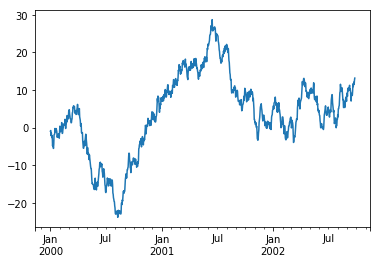

In [130]:
ts.plot()

On DataFrame, plot() is a convenience to plot all of the columns with labels:

In [131]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index,
                  columns=['A', 'B', 'C', 'D'])

In [132]:
df = df.cumsum()

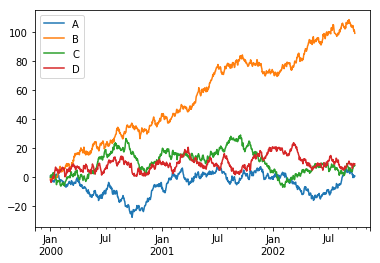

In [133]:
plt.figure(); df.plot(); plt.legend(loc='best')

## Getting Data In/Out

### CSV
[Writing to a csv file](http://pandas.pydata.org/pandas-docs/stable/io.html#io-store-in-csv)

In [134]:
df.to_csv('foo.csv')

[Reading from a csv file](http://pandas.pydata.org/pandas-docs/stable/io.html#io-read-csv-table)

In [135]:
pd.read_csv('foo.csv')

,Unnamed: 0,A,B,C,D
0,2000-01-01,0.927267,-0.655360,0.094857,-1.871880
1,2000-01-02,-0.373781,-2.045079,1.418237,-2.196747
2,2000-01-03,-1.249909,-1.246632,1.661808,-3.458926
3,2000-01-04,-0.656336,-0.469489,0.569028,-2.996160
4,2000-01-05,-1.995435,-1.011206,0.107986,-2.140169
5,2000-01-06,-2.172933,-1.052446,1.323676,-1.778703
6,2000-01-07,-2.287587,1.695631,0.473357,-0.841066
7,2000-01-08,-2.905971,0.800349,2.352456,-0.685280
8,2000-01-09,-2.606441,-0.588098,2.356357,0.741564
9,2000-01-10,-2.310799,-1.041783,3.231915,0.675458


### HDF5
Reading and writing to [HDFStores](http://pandas.pydata.org/pandas-docs/stable/io.html#io-hdf5)

Writing to a HDF5 Store

In [137]:
df.to_hdf('foo.h5','df')

Reading from a HDF5 Store

In [138]:
pd.read_hdf('foo.h5','df')

,A,B,C,D
2000-01-01,0.927267,-0.655360,0.094857,-1.871880
2000-01-02,-0.373781,-2.045079,1.418237,-2.196747
2000-01-03,-1.249909,-1.246632,1.661808,-3.458926
2000-01-04,-0.656336,-0.469489,0.569028,-2.996160
2000-01-05,-1.995435,-1.011206,0.107986,-2.140169
2000-01-06,-2.172933,-1.052446,1.323676,-1.778703
2000-01-07,-2.287587,1.695631,0.473357,-0.841066
2000-01-08,-2.905971,0.800349,2.352456,-0.685280
2000-01-09,-2.606441,-0.588098,2.356357,0.741564
2000-01-10,-2.310799,-1.041783,3.231915,0.675458


### Excel

Reading and writing to [MS Excel](http://pandas.pydata.org/pandas-docs/stable/io.html#io-excel)

Writing to an excel file

In [139]:
df.to_excel('foo.xlsx', sheet_name='Sheet1')

Reading from an excel file

In [141]:
pd.read_excel('foo.xlsx', 'Sheet1', index_col=None, na_values=['NA'])

,A,B,C,D
2000-01-01,0.927267,-0.655360,0.094857,-1.871880
2000-01-02,-0.373781,-2.045079,1.418237,-2.196747
2000-01-03,-1.249909,-1.246632,1.661808,-3.458926
2000-01-04,-0.656336,-0.469489,0.569028,-2.996160
2000-01-05,-1.995435,-1.011206,0.107986,-2.140169
2000-01-06,-2.172933,-1.052446,1.323676,-1.778703
2000-01-07,-2.287587,1.695631,0.473357,-0.841066
2000-01-08,-2.905971,0.800349,2.352456,-0.685280
2000-01-09,-2.606441,-0.588098,2.356357,0.741564
2000-01-10,-2.310799,-1.041783,3.231915,0.675458


### Gotchas
If you are trying an operation and you see an exception like:

In [142]:
if pd.Series([False, True, False]):
    print("I was true")

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

See [Comparisons](http://pandas.pydata.org/pandas-docs/stable/basics.html#basics-compare) for an explanation and what to do.

See [Gotchas](http://pandas.pydata.org/pandas-docs/stable/gotchas.html#gotchas) as well.